# Image Processing Practices 

These are small practices to understand image processing  
(reference: Udacity materials) 

## Show images as numerical data

In [0]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [0]:
from google.colab import drive
drive.mount("/content/drive/")

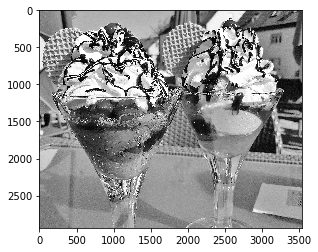

In [6]:
# image comes from https://www.pexels.com/photo/cherries-chilled-chocolate-close-up-209424/

image = mpimg.imread('./drive/My Drive/icecream.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')
pass 

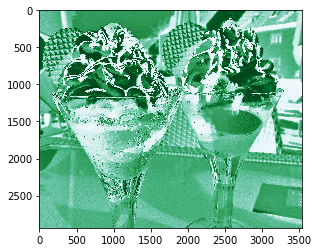

In [7]:
plt.imshow(gray_image, cmap='BuGn')
pass 

In [8]:
x, y = 400, 300
print(gray_image[y,x])

142


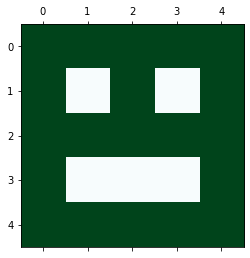

In [9]:
tiny_image = np.array([[255, 255, 255, 255, 255],
                       [255,   0, 255,   0, 255],
                       [255, 255, 255, 255, 255],
                       [255,   0,   0,   0, 255],
                       [255, 255, 255, 255, 255]])

plt.matshow(tiny_image, cmap = 'BuGn')
pass 

## Blue Screen

In [0]:
image2 = cv2.imread('./drive/My Drive/pizza_bluescreen.jpg')

<class 'numpy.ndarray'>


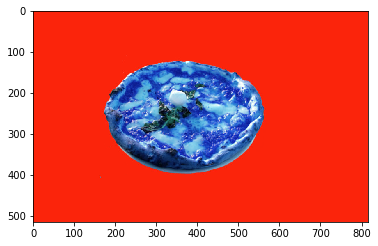

In [13]:
print(type(image2))
plt.imshow(image2)
pass 

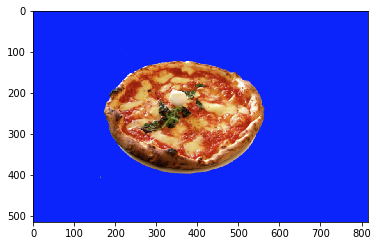

In [14]:
img2_copy = np.copy(image2)
img2_copy = cv2.cvtColor(img2_copy, cv2.COLOR_BGR2RGB)   # changed the color to RGB since original cv2 color settings is BGR 
plt.imshow(img2_copy)
pass 

In [0]:
blue_threshold_low = np.array([0, 0, 200])
blue_threshold_high = np.array([255, 255, 255])

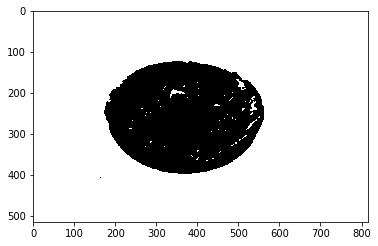

In [16]:
mask = cv2.inRange(img2_copy, blue_threshold_low, blue_threshold_high)
plt.imshow(mask, cmap='gray')
pass 

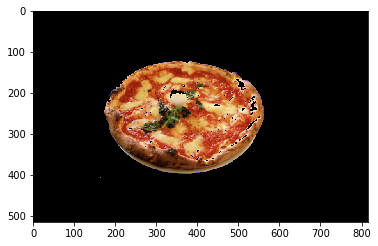

In [17]:
masked_image = np.copy(img2_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)
pass 

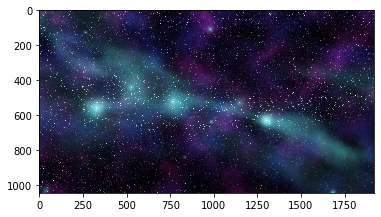

In [19]:
background_image = cv2.imread('./drive/My Drive/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
plt.imshow(background_image)
pass 

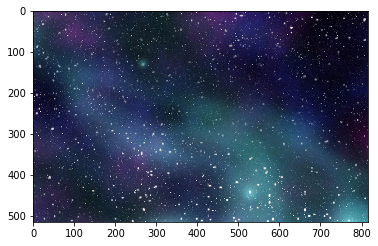

In [20]:
background_image = background_image[:masked_image.shape[0],:masked_image.shape[1]]  # cropping to make it the same size with the masked image
plt.imshow(background_image)
pass 

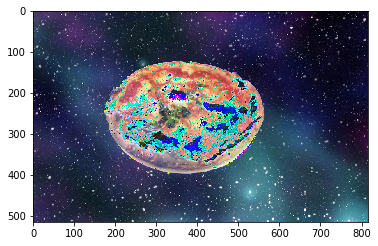

In [21]:
complete_image = masked_image + background_image 
plt.imshow(complete_image)
pass 

## Day and Night Image Simple Classification

In [0]:
import glob 
import os
import pandas as pd

In [0]:
# images are from Udacity course and originally from AMOS dataset 

image_dir_training = './drive/My Drive/day_night_images/training/'
image_dir_test = './drive/My Drive/day_night_images/test/'

In [0]:
# image loading and labeling, with size standardization 

im_list = []
image_types = ['day', 'night']   

image_type_codes = {'day': 1, "night":0 }
code_image_type = {1:'day', 0: "night" }

standard_size = (1100,600)

for im_type in image_types: 
  for file in glob.glob(os.path.join(image_dir_training, im_type, "*")):
    im = mpimg.imread(file)
    if not im is None: 
      im_list.append([cv2.resize(im, standard_size), image_type_codes[im_type]])

In [36]:
print(im_list[0][0].shape)
print(im_list[0][1])

(600, 1100, 3)
1


image of day


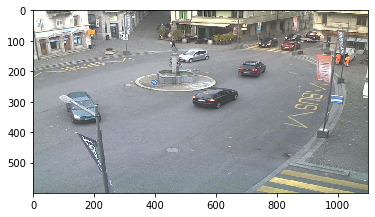

In [41]:
# showing a sample image

image_num = 10

selected_image = im_list[image_num][0]
selected_label = im_list[image_num][1]

plt.imshow(selected_image)
print(f'image of {code_image_type[selected_label]}')

image of night


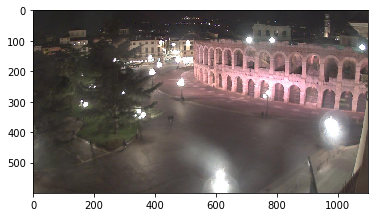

In [43]:

image_num = 200

selected_image = im_list[image_num][0]
selected_label = im_list[image_num][1]

plt.imshow(selected_image)
print(f'image of {code_image_type[selected_label]}')

In [0]:
# Manual feature extraction - average brightness 

def avg_brightness(rgb_image): 

  hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
  sum_brightness = np.sum(hsv[:,:,2])
  area = standard_size[0] * standard_size[1]
  ave_brightness = sum_brightness / area 

  return ave_brightness
  

In [46]:
brightness = avg_brightness(selected_image)
print(f'brightness is {brightness}')

brightness is 99.41147424242425


In [0]:
brightness_df = pd.DataFrame(columns=['daynight', 'brightness'])

for img in im_list:  
  brightness_df.loc[len(brightness_df)-1] = ([img[1], avg_brightness(img[0])])

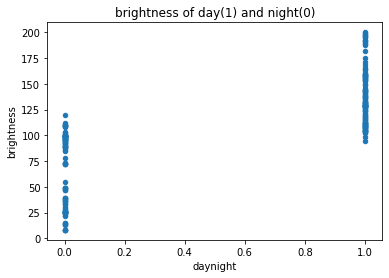

In [62]:
# data visualization

brightness_df.plot.scatter(x='daynight', y='brightness',title='brightness of day(1) and night(0)')
pass 

In [77]:
# just classify by brightness with a threshold 

threshold = 100  # observed from the chart above. Higher than this is day, and lower is night

brightness_df['predict'] = brightness_df['brightness'].apply(lambda x: 1 if x > threshold else 0)

evaluate_df = brightness_df.groupby(['daynight', 'predict']).count().reset_index()
evaluate_df.columns = (['daynight', 'predict', 'count'])

print(evaluate_df)

accuracy =  evaluate_df[evaluate_df['daynight'] == evaluate_df['predict'] ]['count'].sum() / evaluate_df['count'].sum()

print(f'\n accurary is {accuracy}')


   daynight  predict  count
0       0.0        0     94
1       0.0        1     12
2       1.0        0      2
3       1.0        1    118

 accurary is 0.9380530973451328


Brightness is a good feature of classify day and night images